# Investigating $\phi(x, c)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import logit, expit

## Basic function: $\phi(x, c)$ 

The function $\phi(x, c)$ determines the effect of the prior on the estimate of the stimulus $s_t$ in both our model and Glaze et al.'s. The function is defined as:
$$
\phi(x, c) = \log(e^{x + c} + 1) - \log(e^c + e^x)
$$

In [2]:
def phi(x, c):
    return np.log(np.exp(c + x) + 1) - np.log(np.exp(c) + np.exp(x))

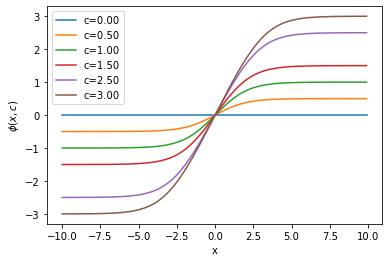

In [3]:
x = np.arange(-10, 10, 0.1)
c_vals = [0.0, 0.5, 1.0, 1.5, 2.5, 3.0]

for c in c_vals:
    plt.plot(x, phi(x, c), label=f'c={c:.2f}')
    
plt.xlabel('x')
plt.ylabel('$\phi(x, c)$')
plt.legend();

One important thing to note about this plot is that the asymptotes of $\phi(x, c)$ are $x = +c$ and $x = -c$. 

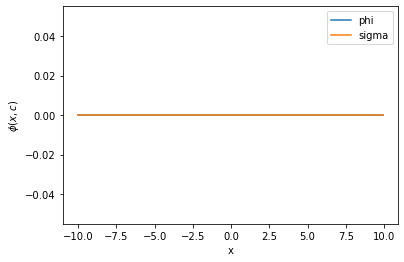

In [4]:
x = np.arange(-10, 10, 0.1)
c = 0.

plt.plot(x, phi(x, c), label='phi')
plt.plot(x, c * (2 * expit(x) - 1), label='sigma')
    
plt.xlabel('x')
plt.ylabel('$\phi(x, c)$')
plt.legend();

## Prior term: $\psi_H(x)$

In Glaze et al.'s model, the prior log ratio is expressed as:
$$
\begin{align*}
\psi_H(x) 
    &= \phi(x, \log\frac{1 - H}{H}) \\
    &= x + \log(\frac{1 - H}{H} + e^{-x}) - \log(\frac{1 - H}{H} + e^x)
\end{align*}
$$

In [5]:
def psi(x, h):
    return phi(x, np.log(1 - h) - np.log(h))

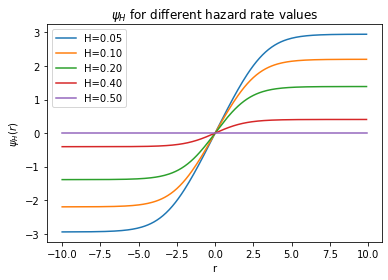

In [6]:
x = np.arange(-10, 10, 0.1)
h_vals = [0.05, 0.1, 0.2, 0.4, 0.5]

for h in h_vals:
    plt.plot(x, psi(x, h), label=f'H={h:.2f}')
    
plt.xlabel('r')
plt.ylabel('$\psi_H(r)$')
plt.title('$\psi_H$ for different hazard rate values')
plt.legend();
#plt.savefig('/Users/cmcgrory/engel_lab/presentations/rotation_talk/img/psi_hvals.png')

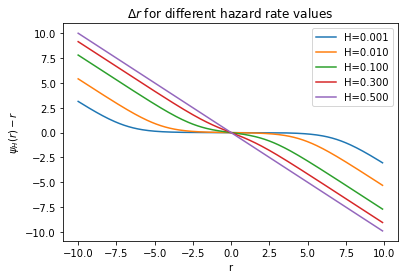

In [13]:
x = np.arange(-10, 10, 0.1)
h_vals = [0.001, 0.01, 0.1, 0.3, 0.5]

for h in h_vals:
    plt.plot(x, psi(x, h) - x, label=f'H={h:.3f}')
    
plt.xlabel('r')
plt.ylabel('$\psi_H(r) - r$')
plt.title('$\Delta r$ for different hazard rate values')
plt.legend();

## Derivative of $\phi$

The derivative of $\phi(x, c)$ with respect to $x$ is:
$$
\begin{align}
\frac{\partial \phi}{\partial x} 
    &= \frac{\partial}{\partial x} \log(e^{x + c} + 1) - \log(e^c + e^x) \\
    &= \frac{e^{x + c}}{e^{x + c} + 1} - \frac{e^x}{e^c + e^x} \\
    &= \frac{1}{1 + e^{-(x + c)}} - \frac{1}{1 + e^{-(x - c)}} \\
    &= \sigma(x + c) - \sigma(x - c)
\end{align}
$$
where $\sigma(x)$ is the logistic function:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

## Compositions of $\phi$

It can be shown that:
$$
\phi(\phi(x, c_1), c_2) = \phi(x, \phi(c_1, c_2))
$$
**Note: Add proof at some point!**

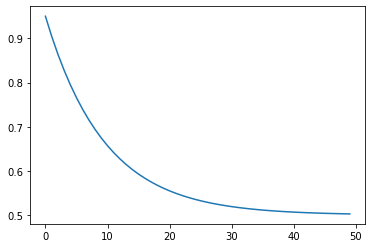

In [7]:
p = 0.95
A = np.array([[p, 1-p], [1-p, p]])

z_vals = []
A_i = A
for i in range(50):
    z_vals.append(A_i[0, 0])
    A_i = A_i @ A
    
plt.plot(z_vals)

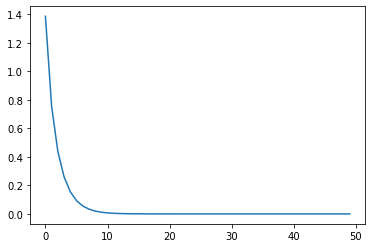

In [38]:
lz_vals = [np.log(z / (1-z)) for z in z_vals]
plt.plot(lz_vals)